<a href="https://colab.research.google.com/github/JiayuShen0912/Computer-Vision-Project/blob/JiayuShen%26JackyLam/JiayuShen%26JackyLam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Computer Vision Project <b> </h1></center>

Our computer vision project idea is **“Smart Waste Classifier and Management Model”**. We are trying to address **the problem of inadequate waste management and sorting**, which is leading to increased pollution and inefficient recycling processes worldwide. This is an important issue because inadequate waste management and sorting not only contributes to environmental degradation but also results in the loss of valuable materials that could be recycled and reused. Effective waste management is essential for sustainable development, environmental protection and public health. By improving waste separation and recycling processes, we can reduce landfill usage, reduce greenhouse gas emissions, conserve natural resources, and minimize pollution. We are working to develop a smart waste classifier based on computer vision that can automatically identify waste and classify it into predefined categories, such as accurately classifying waste into categories such as organic, recyclable and hazardous. The model we will create can be implemented in smart bins or waste collection centers to simplify the sorting process.

Our project is primarily a classification problem, where the task is to classify waste into predefined categories such as organic, recyclable, and hazardous. It is a supervised learning task since it requires labeled data for training the model to recognize and categorize waste accurately.

In [3]:
#First, link to our google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Description

Waste Images for Object Classification


- 40 images in train folder. 20 images in val folder.

- 3 different waste:

    - hazardous waste

    - organic waste

    - recyclable waste


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [5]:
%cd "/content/drive/MyDrive/Colab Notebooks"
!ls

/content/drive/MyDrive/Colab Notebooks
'311c4f644d9850f43eec60b52af0e49b (1).ipynb'
 311c4f644d9850f43eec60b52af0e49b.ipynb
 about-organic-waste.jpg
'Copy of Introduction_to_Python (1).ipynb'
'Copy of Introduction_to_Python (2).ipynb'
'Copy of Introduction_to_Python.ipynb'
'Copy of Week_2_Data_Preprocessing (1).ipynb'
'Copy of Week_2_Data_Preprocessing.ipynb'
'File:December_3,_2012_–_Household_Hazardous_Waste_separated_for_proper_disposal_(8268772840).jpg'
'Food Residuals.png'
 GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg
 household-hazardous-waste.jpg
'Jiayu Shen_Assignment2.ipynb'
'JiayuShen&JackyLam.ipynb'
'Jiayu_Shen_Week 3.ipynb'
'Jiayu Shen_Week4.ipynb'
 runs
'waste dataset'
 yolov8n-cls.pt
 yolov8n.pt


# Classification Task




YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


## 1. Training

In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
model.train(data='/content/drive/MyDrive/Colab Notebooks/waste dataset', epochs=5)  # train the model


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Colab Notebooks/waste dataset, epochs=5, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

train: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/train... 40 images, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/waste dataset/train/organic waste/organic_waste_4.jpeg: corrupt JPEG restored and saved



val: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/val... 20 images, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train6
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5         0G      1.185         16        224:  33%|███▎      | 1/3 [00:09<00:18,  9.21s/it]


100%|██████████| 755k/755k [00:00<00:00, 11.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:13<00:00, 13.43s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all        0.4          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all        0.4          1



5 epochs completed in 0.018 hours.
Optimizer stripped from runs/classify/train6/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train6/weights/best.pt, 3.0MB

Validating runs/classify/train6/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/waste dataset/train... found 40 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/waste dataset/val... found 20 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]


                   all        0.4          1
Speed: 0.0ms preprocess, 10.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train6
Results saved to runs/classify/train6


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5954eedf60>
curves: []
curves_results: []
fitness: 0.7000000029802322
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.4000000059604645, 'metrics/accuracy_top5': 1.0, 'fitness': 0.7000000029802322}
save_dir: PosixPath('runs/classify/train6')
speed: {'preprocess': 0.0009417533874511719, 'inference': 10.735774040222168, 'loss': 0.00010728836059570312, 'postprocess': 0.00016689300537109375}
task: 'classify'
top1: 0.4000000059604645
top5: 1.0

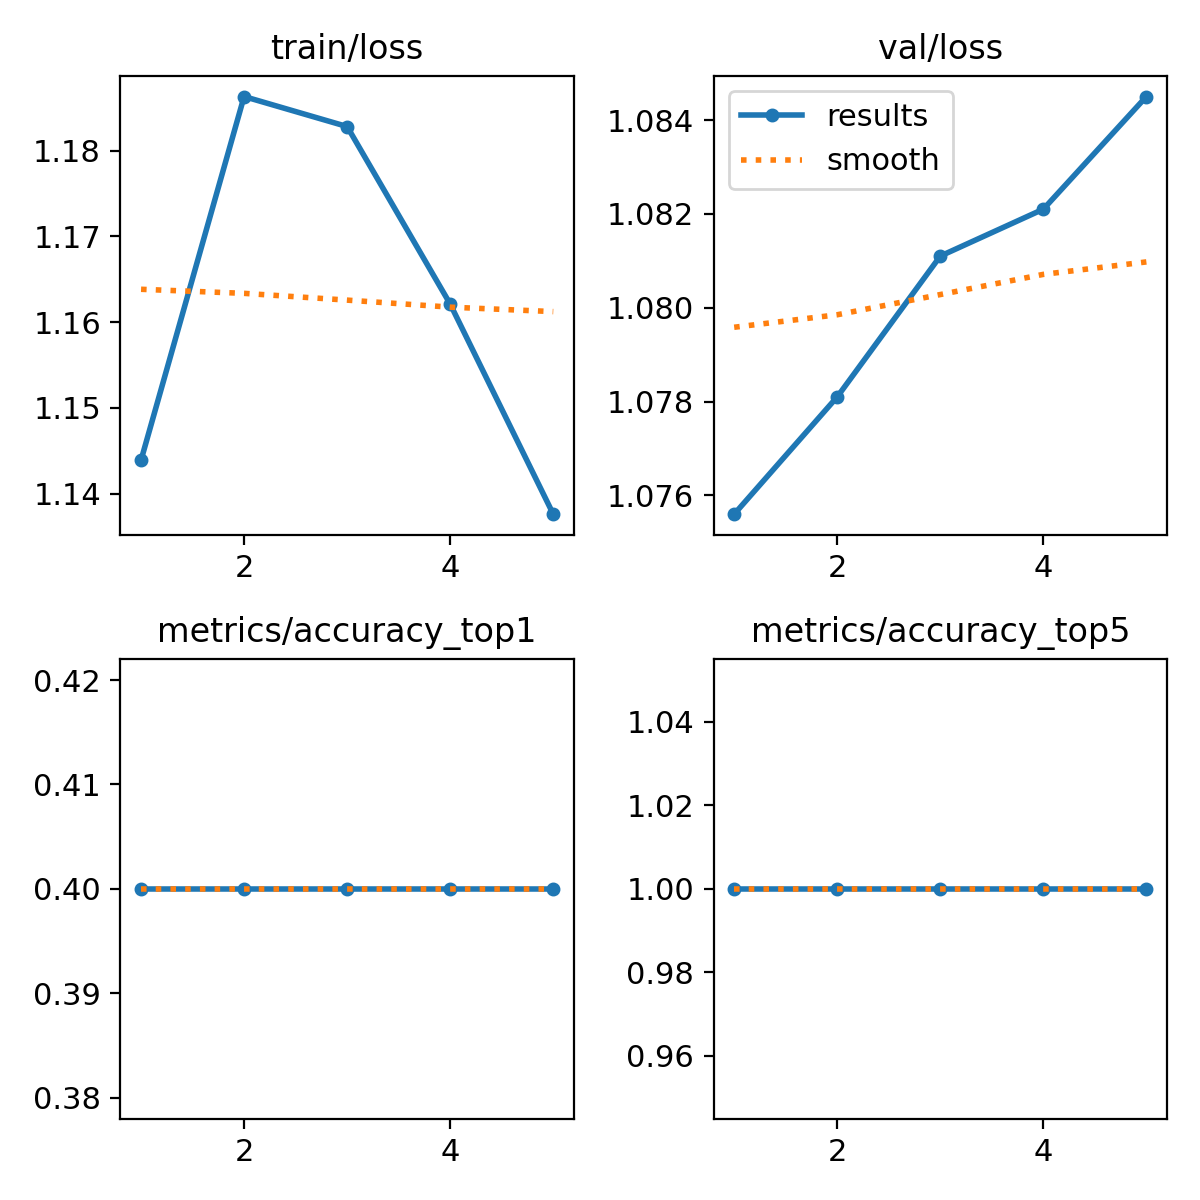

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/train6/results.png')


When we increased imgsz from 224 to 600, we got:

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/drive/MyDrive/Colab Notebooks/waste dataset', epochs=6, imgsz=600)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/drive/MyDrive/Colab Notebooks/waste dataset, epochs=6, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_s

train: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/train... 40 images, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/waste dataset/train/organic waste/organic_waste_4.jpeg: corrupt JPEG restored and saved



val: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/val... 20 images, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 2 dataloader workers
Logging results to runs/classify/train7
Starting training for 6 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc:   0%|          | 0/1 [00:00<?, ?it/s]

               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all        0.6          1



100%|██████████| 755k/755k [00:00<00:00, 8.37MB/s]



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.29it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all       0.55          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.19it/s]

                   all        0.6          1



6 epochs completed in 0.010 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 3.0MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/waste dataset/train... found 40 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/waste dataset/val... found 20 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]


                   all        0.6          1
Speed: 0.8ms preprocess, 1.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7
Results saved to runs/classify/train7


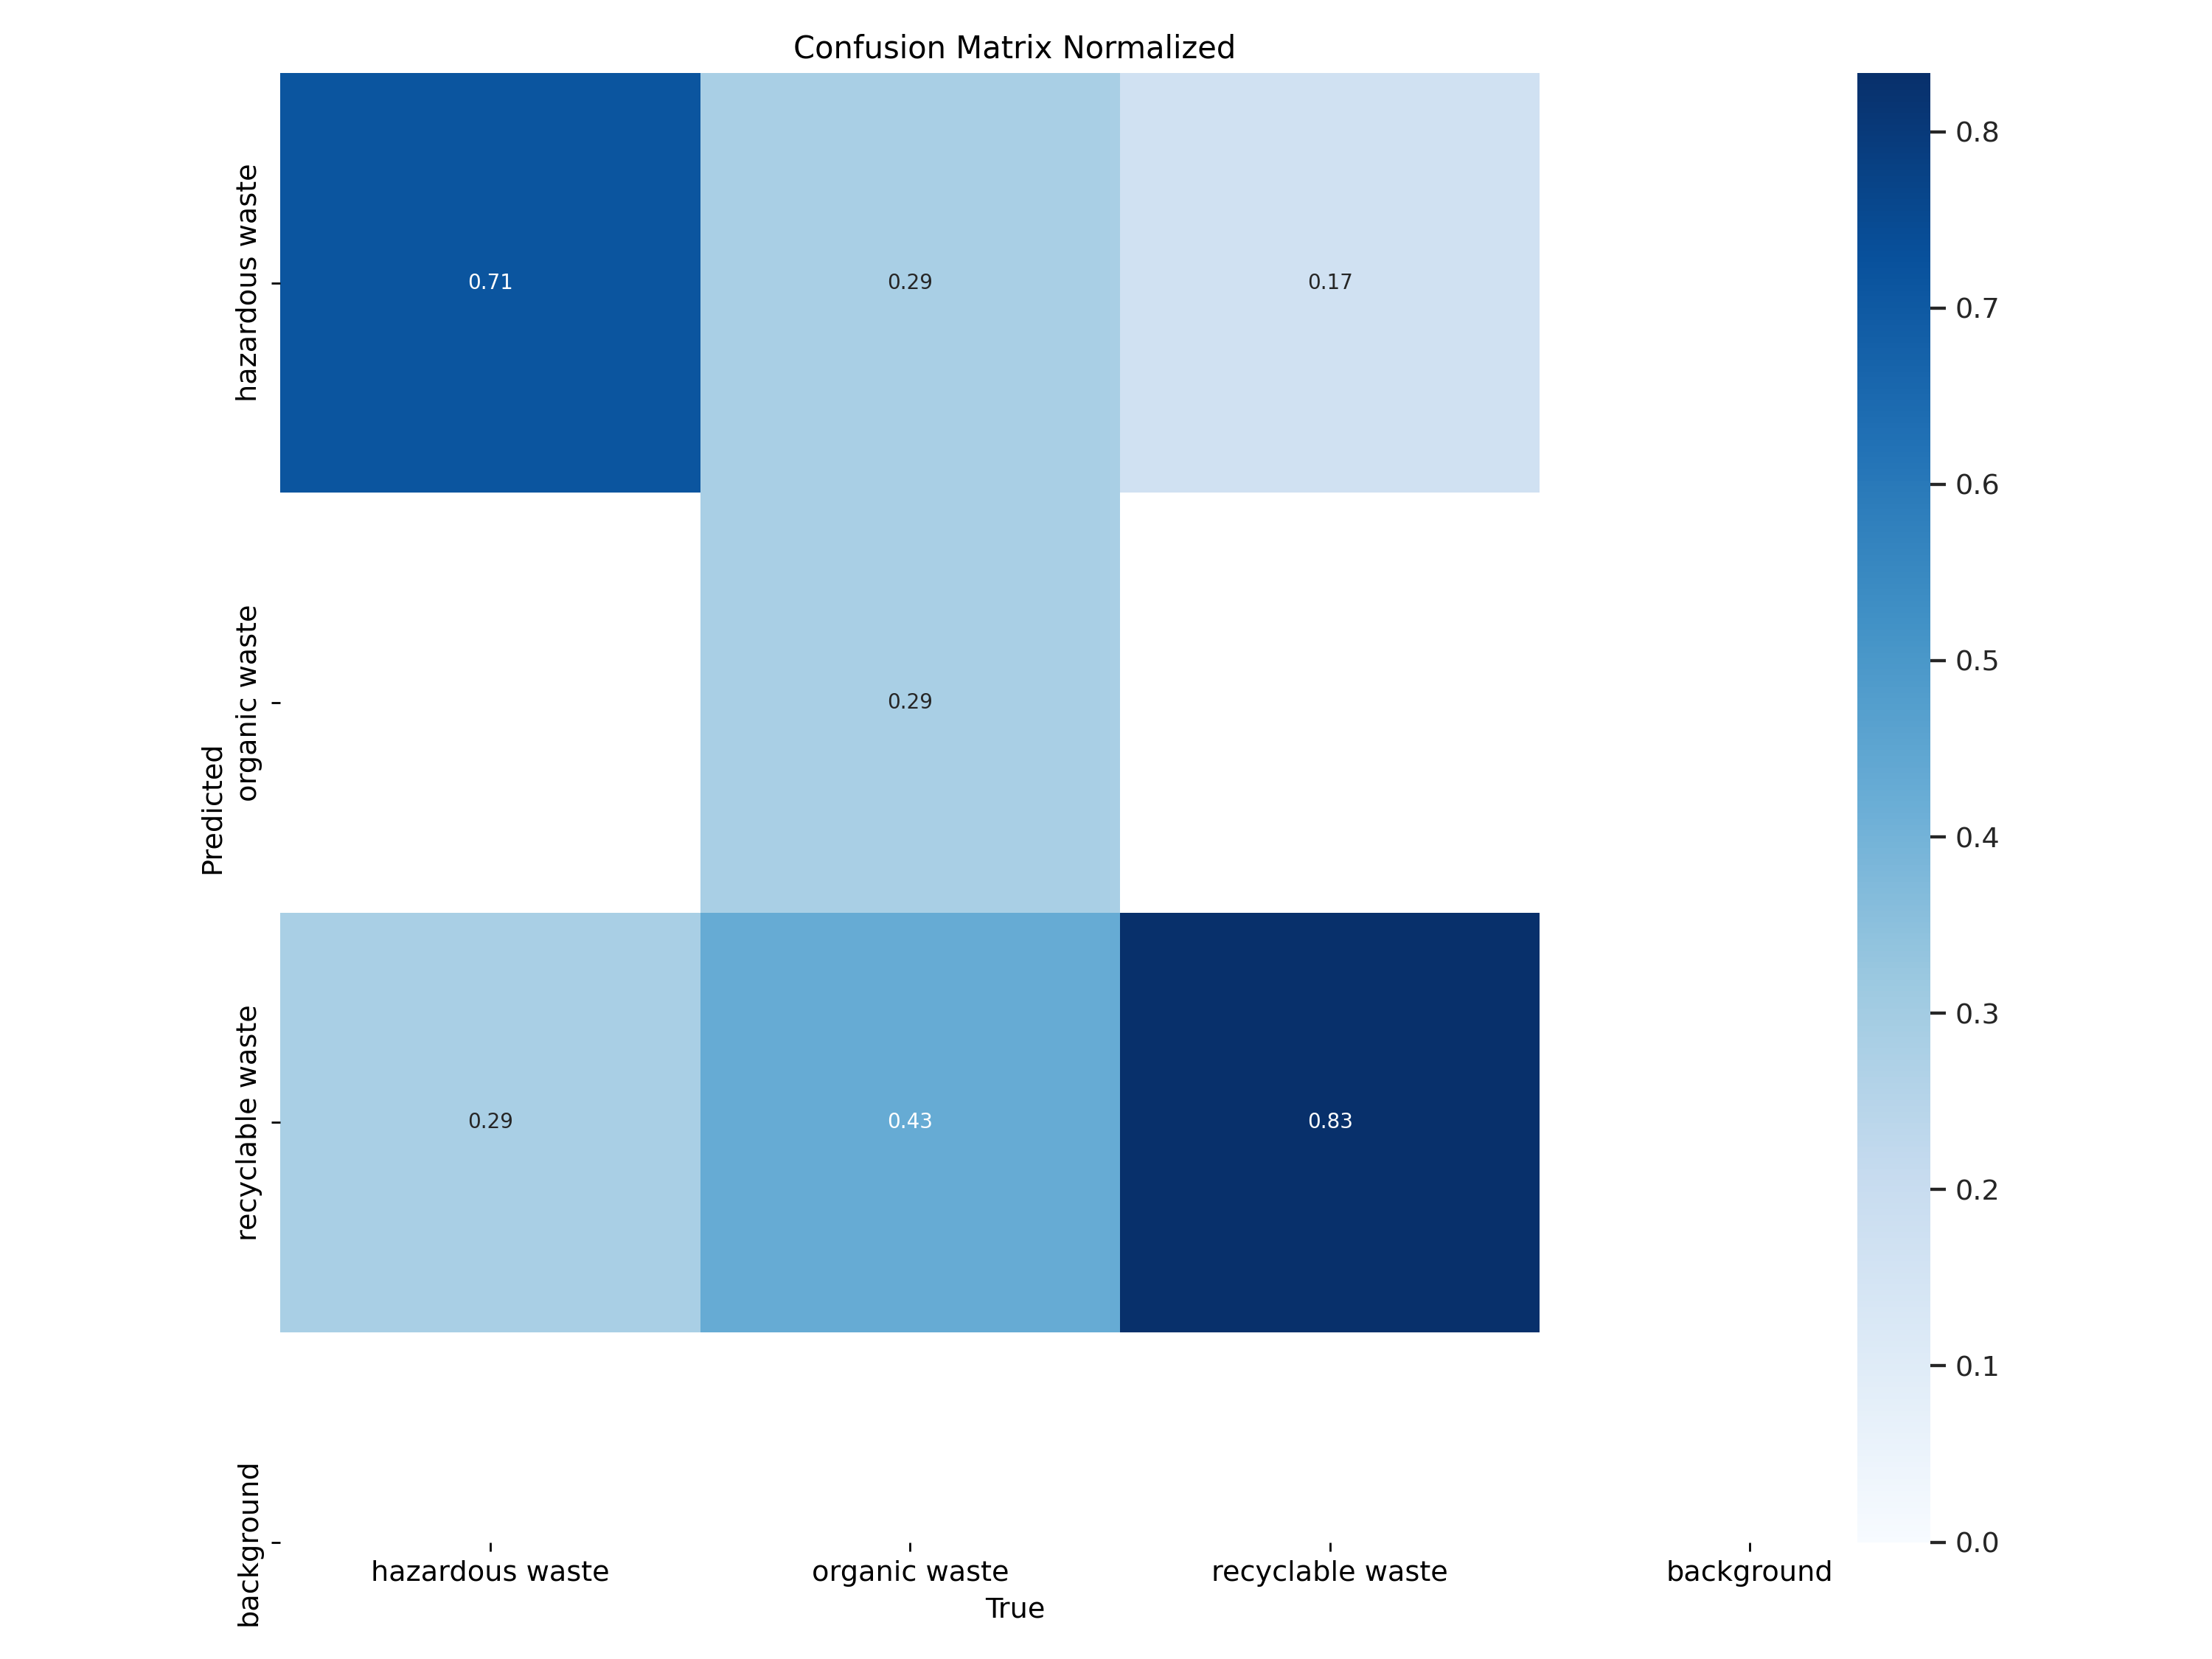

In [7]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/train7/confusion_matrix_normalized.png')

## 2. Evaluation


In [ ]:
model= YOLO("/content/drive/MyDrive/Colab Notebooks/runs/classify/train6/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Colab Notebooks/waste dataset/train... found 40 images in 3 classes ✅ 
val: /content/drive/MyDrive/Colab Notebooks/waste dataset/val... found 20 images in 3 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/Colab Notebooks/waste dataset/val... 20 images, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


                   all        0.4          1
Speed: 0.0ms preprocess, 11.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0

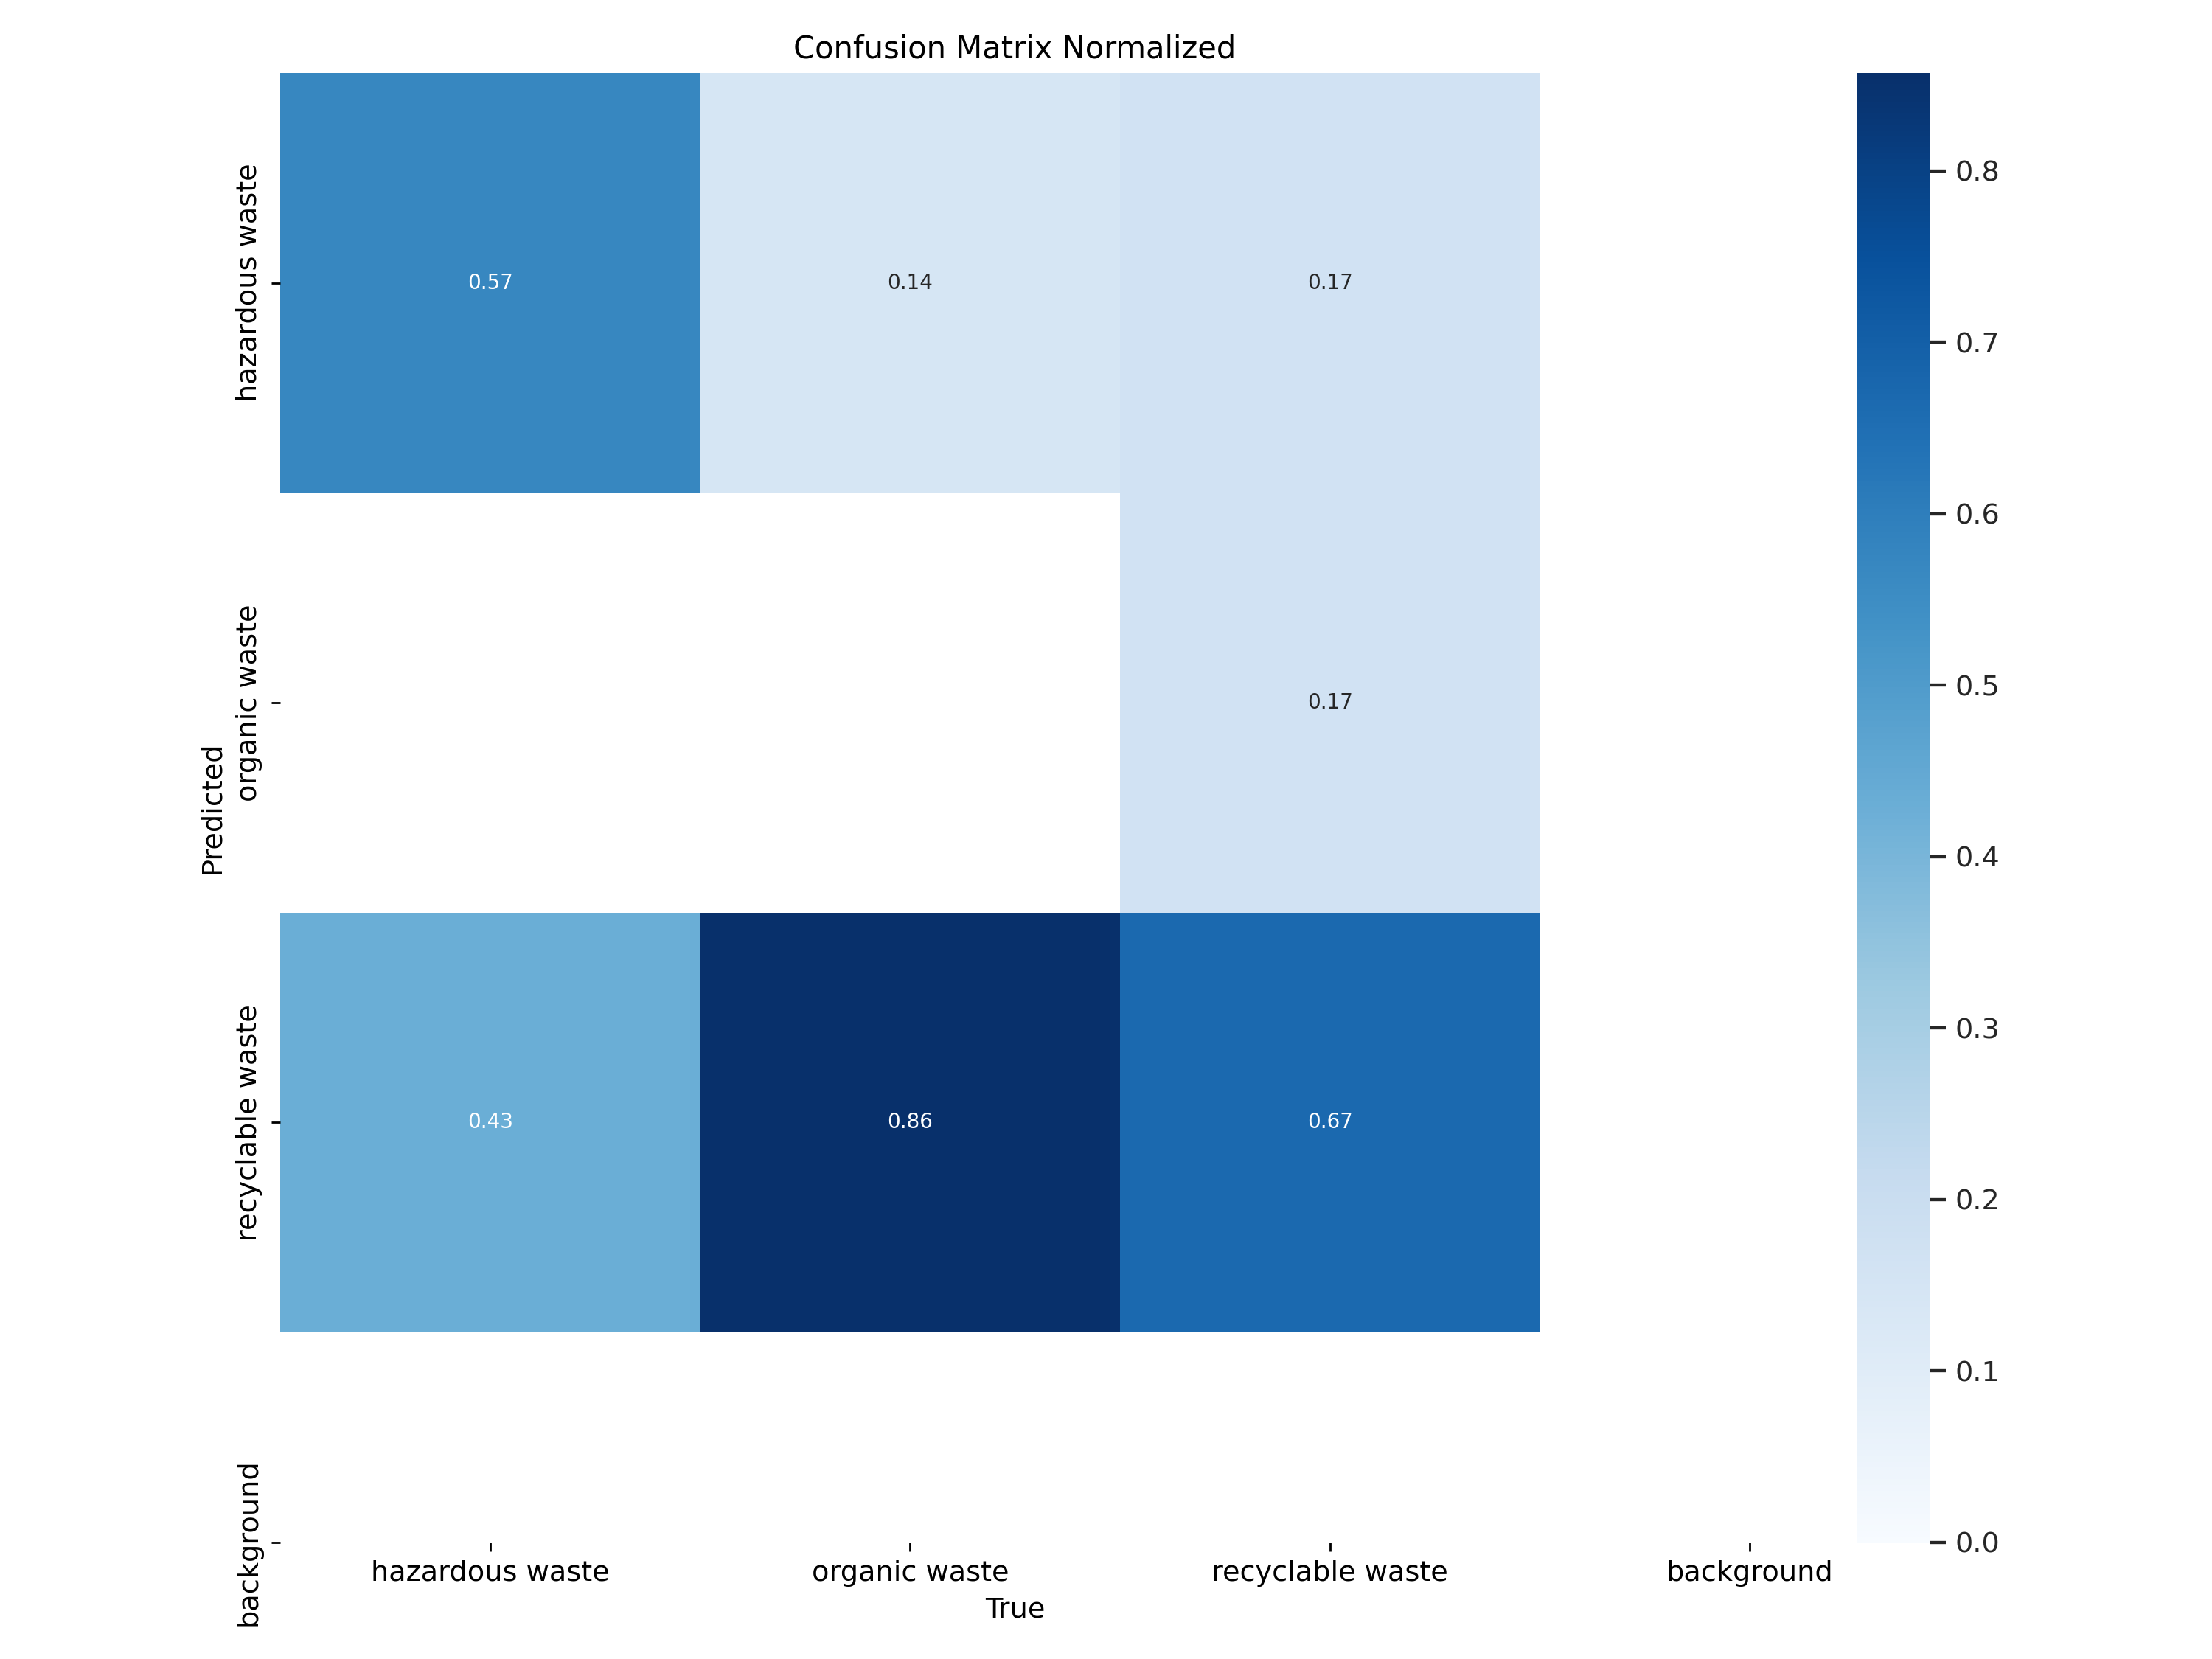

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/val/confusion_matrix_normalized.png')

## 3. Prediction


In [ ]:
results=model('https://www.epa.gov/sites/default/files/2014-06/household-hazardous-waste.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities



WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


100%|██████████| 32.0k/32.0k [00:00<00:00, 2.12MB/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/drive/MyDrive/Colab Notebooks/household-hazardous-waste.jpg: 224x224 hazardous waste 0.56, recyclable waste 0.24, organic waste 0.21, 25.2ms
Speed: 6.0ms preprocess, 25.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.5557, 0.2073, 0.2369])
orig_shape: None
shape: torch.Size([3])
top1: 0
top1conf: tensor(0.5557)
top5: [0, 2, 1]
top5conf: tensor([0.5557, 0.2369, 0.2073])


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


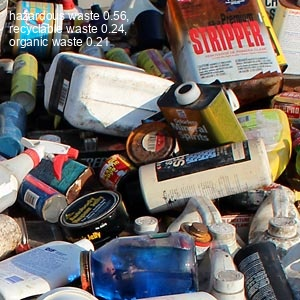

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict/household-hazardous-waste.jpg')

In [ ]:
results=model('https://www.treehugger.com/thmb/zcbeyVtOH23xFmbxXPSDJvxpEp8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities


Found https://www.treehugger.com/thmb/zcbeyVtOH23xFmbxXPSDJvxpEp8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg locally at GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/drive/MyDrive/Colab Notebooks/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg: 224x224 recyclable waste 0.48, organic waste 0.31, hazardous waste 0.21, 25.7ms
Speed: 10.4ms preprocess, 25.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.2122, 0.3092, 0.4786])
orig_shape: None
shape: torch.Size([3])
top1: 2
top1conf: tensor(0.4786)
top5: [2, 1, 0]
top5conf: tensor([0.4786, 0.3092, 0.2122])


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


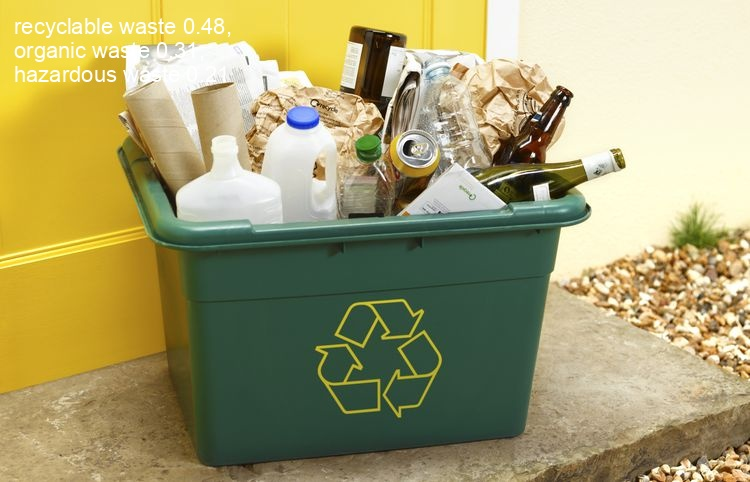

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict/GettyImages-150517191-f6508c958e3f4505a5e0ddda19d3d7ce.jpg')

In [ ]:
results=model('http://www.cec.org/fw/wp-content/uploads/2018/02/about-organic-waste.jpg', save=True)
#results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities


Found http://www.cec.org/fw/wp-content/uploads/2018/02/about-organic-waste.jpg locally at about-organic-waste.jpg
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/drive/MyDrive/Colab Notebooks/about-organic-waste.jpg: 224x224 hazardous waste 0.41, recyclable waste 0.31, organic waste 0.28, 91.2ms
Speed: 69.4ms preprocess, 91.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.4084, 0.2787, 0.3129])
orig_shape: None
shape: torch.Size([3])
top1: 0
top1conf: tensor(0.4084)
top5: [0, 2, 1]
top5conf: tensor([0.4084, 0.3129, 0.2787])
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


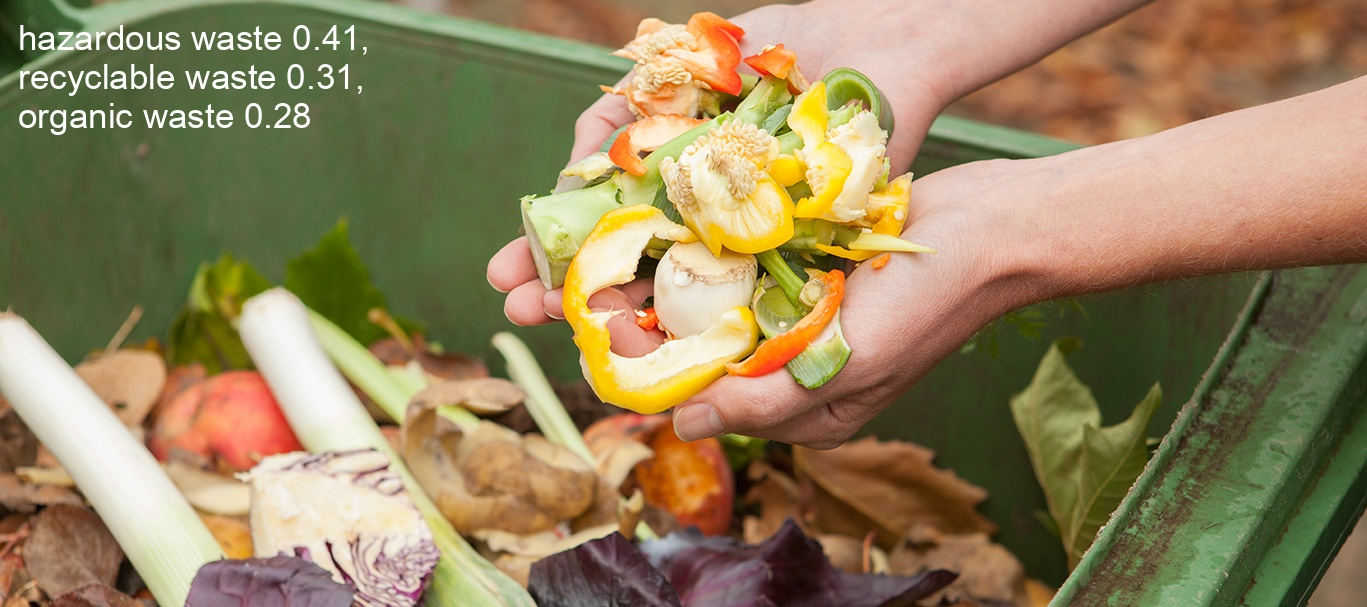

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/Colab Notebooks/runs/classify/predict/about-organic-waste.jpg')